<a href="https://colab.research.google.com/github/rpdahxn/HandsOnML/blob/main/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

설정

In [4]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## 9.1 군집

In [1]:
# 군집(비지도 학습) vs 분류(지도 학습)
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

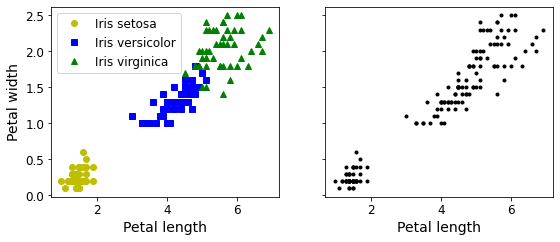

In [5]:
plt.figure(figsize = (9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c = "k", marker = ".")
plt.xlabel("Petal length", fontsize = 14)
plt.tick_params(labelleft = False)

plt.show()

In [6]:
# 가우시안 혼합 모델은 3개의 클러스터를 잘 나눌 수 있다.
from sklearn.mixture import GaussianMixture

In [7]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(X).predict(X)

In [8]:
# 각 클러스터를 하나의 클래스에 매핑해 본다.
# 이 매핑을 하드 코딩하는 대신 각 클러스터에서 가장 많은 클래스를 선택한다.
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{0: 2, 1: 0, 2: 1}

In [9]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

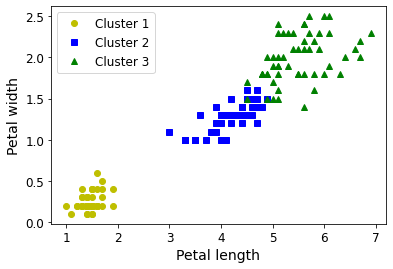

In [10]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label = "Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label = "Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label = "Cluster 3")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 12)

plt.show()

### 9.1.1 k-평균

In [11]:
# 우선 예제 데이터를 생성한다.
from sklearn.datasets import make_blobs

In [12]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

In [14]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

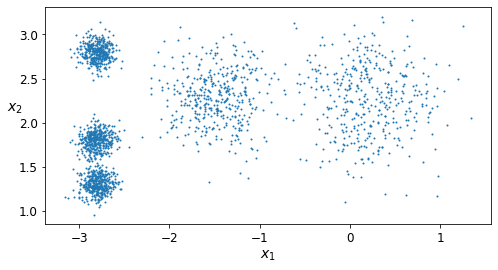

In [15]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

In [16]:
# 이 데이터셋에 k-평균 군집 알고리즘을 훈련해 본다.
# 이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당한다.
from sklearn.cluster import KMeans

In [17]:
k = 5  # 알고리즘이 찾을 클러스터 개수
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

각 샘플은 5개의 클러스터 중 하나에 할당된다.

In [18]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [19]:
y_pred is kmeans.labels_

True

In [20]:
# 알고리즘이 찾은 5개의 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [21]:
# KMeans 객체는 훈련한 샘플의 레이블을 가지고 있다.
# 여기에서 샘플의 레이블은 샘플에 할당한 클러스터의 인덱스
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [22]:
# 새로운 샘플의 레이블 예측하기
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [23]:
# 이 모델의 결정 경계를 그려 본다.
# 이 그림은 보로노이 다이어그램 이 된다.
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

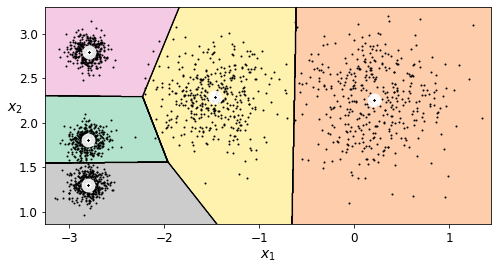

In [24]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

하드 군집 vs 소프트 군집

In [25]:
# 하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택한다.
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

즉 X_new의 첫 번째 샘플이 첫 번째 센트로이드에서 0.33, 두 번째 센트로이드에서 2.81 만큼 떨어져 있음을 의미한다.  

In [26]:
# 위에서 구한 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인할 수 있다.
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

#### k-평균 알고리즘

In [27]:
# k-평균 알고리즘을 1, 2, 3회 반복하고 센트로이드가 어떻게 움직이는지 확인해 본다.
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 1, random_state = 0)
kmeans_iter2 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 2, random_state = 0)
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 3, random_state = 0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

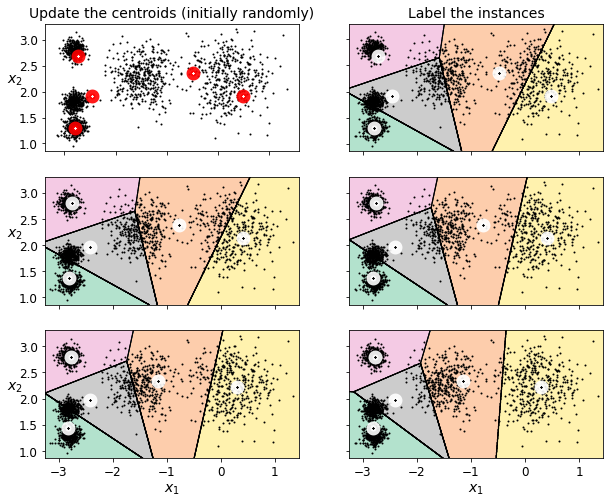

In [28]:
# 그래프를 그려본다.
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()